# Irreducible Mass of Black Holes

## Work in progress!!!

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 

\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\end{equation}

For convenience, let us define 
$f= M_{\rm irr}/M$

\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
\end{equation}

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

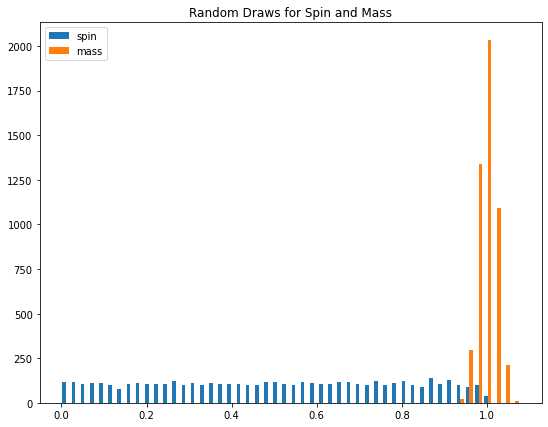

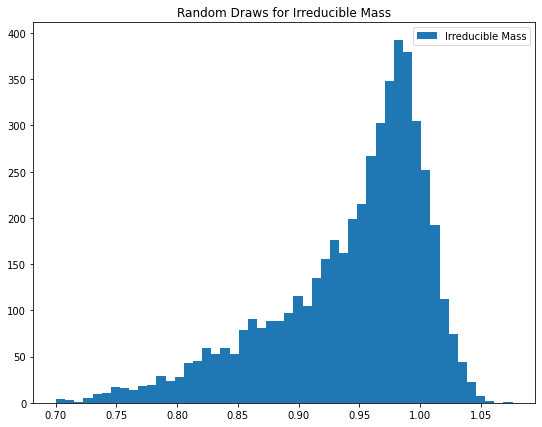

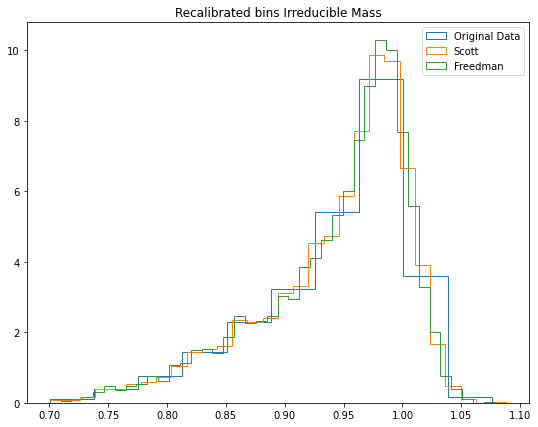

In [23]:
#.1 & .2 Generating random samples for irreducible mass and performing basic analysis with rule-of-thumb histograms

N = 5000
mu = 1
sigma = 0.02
bins = 50

spin = np.random.uniform(0, 1, N)
mass = stats.norm(mu, sigma).rvs(N)

fig = plt.subplots(figsize=(9, 7))
plt.title('Random Draws for Spin and Mass')
plt.hist([spin, mass], bins=bins, label=['spin', 'mass'])
plt.legend()
plt.show()

m_irr = mass * (0.5 * (1 + (1 - spin**2)**0.5))**0.5

fig = plt.subplots(figsize=(9, 7))
plt.title('Random Draws for Irreducible Mass')
plt.hist(m_irr, bins=bins, label='Irreducible Mass')
plt.legend()
plt.show()

#Implemented rule of thumb binning
fig = plt.subplots(figsize=(9, 7))
plt.title('Recalibrated bins Irreducible Mass')
_ = fancyhist(m_irr, histtype="step", density=True, label='Original Data')
_ = fancyhist(m_irr, bins="scott", histtype="step",density=True, label='Scott')
_ = fancyhist(m_irr, bins="freedman", histtype="step",density=True, label='Freedman')
plt.legend()
plt.show()


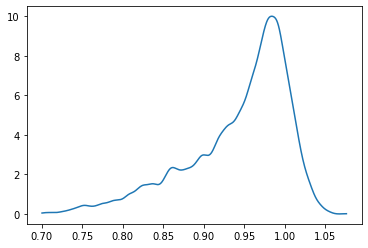

In [44]:
#.3 KDE for M_irr from samples

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde = KernelDensity(bandwidth=bandwidth, kernel=kernel)
    kde.fit(data[:, np.newaxis])
    log_pdf = kde.score_samples(xgrid[:, np.newaxis])
    
    #Result of fit is a log pdf
    pdf = np.exp(log_pdf)
    return pdf

xgrid = np.linspace(m_irr.min(), m_irr.max(), 1000)


bandwidth = 0.005

KDE = kde_sklearn(m_irr, bandwidth, kernel='gaussian')
plt.plot(xgrid, KDE)

In [ ]:
#.4 Kolmogorov-Smirnov distance between M_irr and f



In [ ]:
#.5 Kolmogorov-Smirnov distance between M_irr and M